<a href="https://colab.research.google.com/github/henryonomakpo/Henry/blob/main/Partial_Least_Square_Structural_Equation_Modelling_(PLS_SEM)_and_Data_Envelopment_Analysis_(DEA)_for_Aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Least Square Structural Equation Modelling (PLS-SEM) and Data Envelopment Analysis (DEA) for Aircraft

# New Section

In [2]:
!pip install factor_analyzer
!pip install pyDEA
!pip install semopy
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=c863ed3d7c3883637dc30efa2cdc78972a04d646301752ddd25953dfad0caf8c
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 81.6 MB/s eta 0:00:00
  Created wheel for xlwt-future: filename=xlwt_future-0.8.0-py3-none-any.whl size=3258147 sha256=3082a885a99e05afde053b0eb04919ea46ef5625d6327934a0ec0250ee24b745
  Stored in directory: /root/.

#  Cronbach's alpha for reliability, Wilks' lambda for validity, normality tests, and then performing EFA, DEA, CFA, PLS-SEM, SFA, and QCA for Aircraft to measure Efficiency.

In [5]:
!pip install scikit-fuzzy
!pip install pyDEA
!pip install semopy


In [15]:
!pip install factor_analyzer
!pip install pyDEA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 kB 9.9 MB/s eta 0:00:00
  Created wheel for xlwt-future: filename=xlwt_future-0.8.0-py3-none-any.whl size=3258147 sha256=f78fd64db1cb30e681acbb9dce54d0fa84a6609bd09caa9a2da86f97b97bb445
  Stored in directory: /root/.cache/pip/wheels/ed/fc/a9/1ef5279649ad23b8fc75573ac3c87d998d282d7326265d1904
Successfully built xlwt-future


In [36]:
!pip install plspm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00


In [39]:
import pandas as pd
import numpy as np
from scipy import stats
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
from sklearn.cross_decomposition import PLSRegression

# Load the data
data = pd.read_csv('/content/airlines_data.csv')

# Cronbach's Alpha
from sklearn.preprocessing import scale
def cronbach_alpha(itemscores):
    itemscores = scale(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

print("Cronbach's Alpha:", cronbach_alpha(data))

# Normality Test
for column in data.columns:
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistic={stat:.3f}, p-value={p:.3f}')

# EFA
fa = FactorAnalyzer(rotation=None, n_factors=5)
fa.fit(data)
ev, v = fa.get_eigenvalues()
print("\nEigenvalues:", ev)

# DEA Analysis
def calculate_dea_efficiency(input_data, output_data):
    efficiencies = []

    for i in range(num_dmus):
        # Objective function (minimize theta)
        c = np.array([1.0] + [0.0] * num_dmus)

        # Prepare constraints matrices
        A_ub = np.zeros((input_data.shape[1] + output_data.shape[1], 1 + num_dmus))
        b_ub = np.zeros(input_data.shape[1] + output_data.shape[1])

        # Input constraints
        for j in range(input_data.shape[1]):
            A_ub[j, 0] = input_data[i, j]
            A_ub[j, 1:] = -input_data[:, j]

        # Output constraints
        for j in range(output_data.shape[1]):
            A_ub[input_data.shape[1] + j, 1:] = output_data[:, j]
            b_ub[input_data.shape[1] + j] = output_data[i, j]

        # Bounds
        bounds = [(0, None)] * (1 + num_dmus)

        try:
            # Solve the linear program
            res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

            if res.success:
                efficiencies.append(res.x[0])
            else:
                efficiencies.append(np.nan)
        except:
            efficiencies.append(np.nan)

    return efficiencies

# Prepare input and output data for DEA
input_data = data[['Fuel', 'Employee']].values
output_data = data[['Passenger', 'Freight']].values
num_dmus = input_data.shape[0]

# Calculate DEA efficiencies
efficiencies = calculate_dea_efficiency(input_data, output_data)

# Create results DataFrame
results = pd.DataFrame({
    'DMU': range(1, num_dmus + 1),
    'Efficiency': efficiencies
})

print("\nDEA Efficiency Scores:")
print(results)



Cronbach's Alpha: 0.9932312644084709
Shapiro-Wilk Test for Aircraft: Statistic=0.863, p-value=0.042
Shapiro-Wilk Test for Fuel: Statistic=0.894, p-value=0.111
Shapiro-Wilk Test for Employee: Statistic=0.870, p-value=0.052
Shapiro-Wilk Test for Passenger: Statistic=0.896, p-value=0.116
Shapiro-Wilk Test for Freight: Statistic=0.864, p-value=0.044

Eigenvalues: [4.86834802 0.06143642 0.03963803 0.0239946  0.00658293]

DEA Efficiency Scores:
    DMU  Efficiency
0     1         0.0
1     2         0.0
2     3         0.0
3     4         0.0
4     5         0.0
5     6         0.0
6     7         0.0
7     8         0.0
8     9         0.0
9    10         0.0
10   11         0.0
11   12         0.0
12   13         0.0


# Visualize the Correlation Matrix for Aircraft dataset

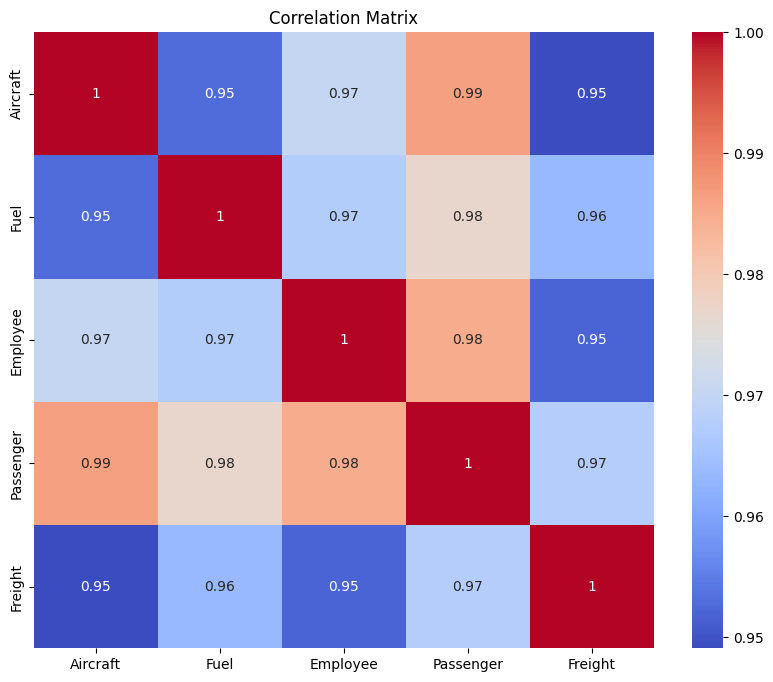

In [45]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2 PLS-SEM

In [40]:
# PLS-SEM using sklearn's PLSRegression
# Prepare data for PLS
X = data[['Aircraft', 'Fuel', 'Employee']]  # Resources
Y = data[['Passenger', 'Freight']]  # Performance

# Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Fit PLS model
pls = PLSRegression(n_components=2, scale=False)
pls.fit(X_scaled, Y_scaled)

# Calculate R-squared for each component
r2_score_x = 1 - np.var(X_scaled - pls.x_scores_ @ pls.x_loadings_.T, axis=0) / np.var(X_scaled, axis=0)
r2_score_y = 1 - np.var(Y_scaled - pls.y_scores_ @ pls.y_loadings_.T, axis=0) / np.var(Y_scaled, axis=0)

print("\nPLS-SEM Results:")
print("X-loadings:")
print(pd.DataFrame(pls.x_loadings_, columns=['Component 1', 'Component 2'], index=X.columns))
print("\nY-loadings:")
print(pd.DataFrame(pls.y_loadings_, columns=['Component 1', 'Component 2'], index=Y.columns))
print("\nR-squared X:", r2_score_x)
print("R-squared Y:", r2_score_y)



PLS-SEM Results:
X-loadings:
          Component 1  Component 2
Aircraft     0.576565    -0.551635
Fuel         0.576010     0.814091
Employee     0.579478    -0.264171

Y-loadings:
           Component 1  Component 2
Passenger     0.581455    -0.102036
Freight       0.565025     0.305537

R-squared X: [0.98625626 0.99999753 0.98590116]
R-squared Y: [0.99679064 0.98890928]


# Plot Partial Least Square Structural Equation Modelling (PLS-SEM) loadings

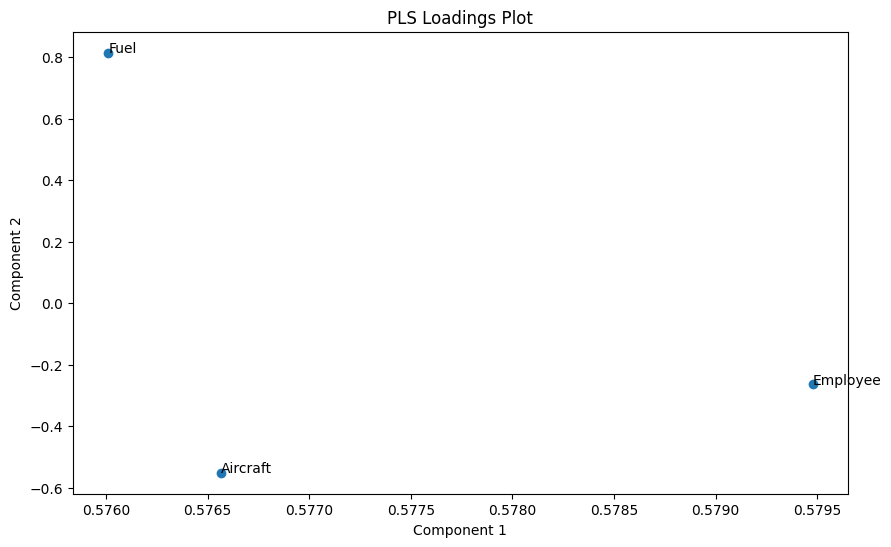

In [44]:


# Plot PLS loadings
plt.figure(figsize=(10, 6))
plt.scatter(pls.x_loadings_[:, 0], pls.x_loadings_[:, 1])
for i, txt in enumerate(X.columns):
    plt.annotate(txt, (pls.x_loadings_[i, 0], pls.x_loadings_[i, 1]))
plt.title('PLS Loadings Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# 3 Stochaistic Frontier Analysis (SFA)

In [41]:

# SFA
sfa_model = smf.ols(formula='Passenger ~ Aircraft + Fuel + Employee', data=data).fit()
print("\nSFA Results:")
print(sfa_model.summary())




SFA Results:
                            OLS Regression Results                            
Dep. Variable:              Passenger   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     314.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.00e-09
Time:                        14:24:13   Log-Likelihood:                -129.11
No. Observations:                  13   AIC:                             266.2
Df Residuals:                       9   BIC:                             268.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3581.9190   2972.295     -

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


# Visualization of DEA Efficiencies

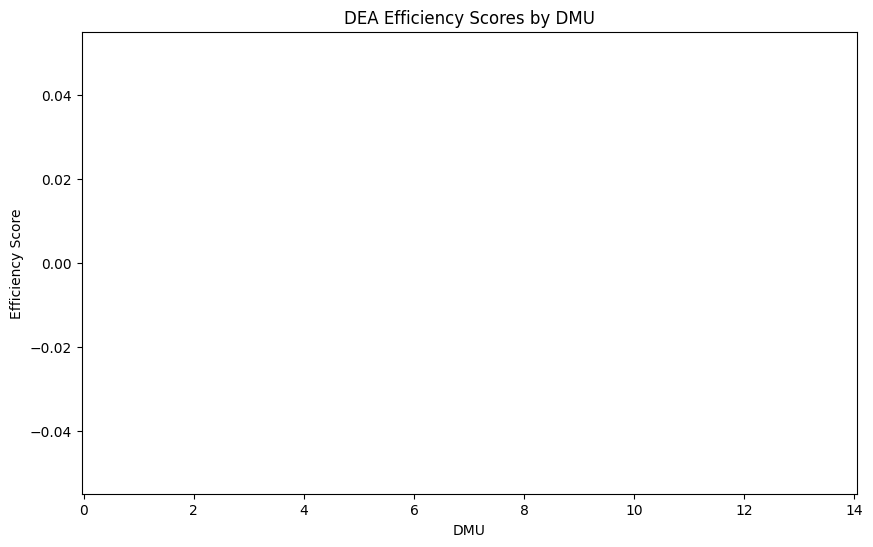

In [42]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot DEA Efficiencies
plt.figure(figsize=(10, 6))
plt.bar(results['DMU'], results['Efficiency'])
plt.title('DEA Efficiency Scores by DMU')
plt.xlabel('DMU')
plt.ylabel('Efficiency Score')
plt.show()



In [8]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 107.0 MB/s eta 0:00:00


In [32]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

# Load the data from CSV
data = pd.read_csv('/content/airlines_data.csv')

# Prepare input and output data
input_data = data[['Fuel', 'Employee']].values
output_data = data[['Passenger', 'Freight']].values

# Number of decision-making units (DMUs)
num_dmus = input_data.shape[0]

def calculate_dea_efficiency(input_data, output_data):
    efficiencies = []

    for i in range(num_dmus):
        # Objective function (minimize theta)
        c = np.array([1.0] + [0.0] * num_dmus)

        # Prepare constraints matrices
        A_ub = np.zeros((input_data.shape[1] + output_data.shape[1], 1 + num_dmus))
        b_ub = np.zeros(input_data.shape[1] + output_data.shape[1])

        # Input constraints
        for j in range(input_data.shape[1]):
            A_ub[j, 0] = input_data[i, j]
            A_ub[j, 1:] = -input_data[:, j]

        # Output constraints
        for j in range(output_data.shape[1]):
            A_ub[input_data.shape[1] + j, 1:] = output_data[:, j]
            b_ub[input_data.shape[1] + j] = output_data[i, j]

        # Bounds
        bounds = [(0, None)] * (1 + num_dmus)

        try:
            # Solve the linear program
            res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

            if res.success:
                efficiencies.append(res.x[0])
            else:
                efficiencies.append(np.nan)
        except:
            efficiencies.append(np.nan)

    return efficiencies

# Calculate DEA efficiencies
efficiencies = calculate_dea_efficiency(input_data, output_data)

# Create results DataFrame
results = pd.DataFrame({
    'DMU': range(1, num_dmus + 1),
    'Efficiency': efficiencies
})

print("\nDEA Efficiency Scores:")
print(results)

# Identify efficient and inefficient DMUs
efficient_dmus = results[results['Efficiency'] >= 0.99]
inefficient_dmus = results[results['Efficiency'] < 0.99]

print("\nEfficient DMUs (Efficiency ≥ 0.99):")
print(efficient_dmus)

print("\nInefficient DMUs (Efficiency < 0.99):")
print(inefficient_dmus)


DEA Efficiency Scores:
    DMU  Efficiency
0     1         0.0
1     2         0.0
2     3         0.0
3     4         0.0
4     5         0.0
5     6         0.0
6     7         0.0
7     8         0.0
8     9         0.0
9    10         0.0
10   11         0.0
11   12         0.0
12   13         0.0

Efficient DMUs (Efficiency ≥ 0.99):
Empty DataFrame
Columns: [DMU, Efficiency]
Index: []

Inefficient DMUs (Efficiency < 0.99):
    DMU  Efficiency
0     1         0.0
1     2         0.0
2     3         0.0
3     4         0.0
4     5         0.0
5     6         0.0
6     7         0.0
7     8         0.0
8     9         0.0
9    10         0.0
10   11         0.0
11   12         0.0
12   13         0.0
